# 📊 EDA: Chicago 311 Service Requests
Exploratory Data Analysis of Chicago 311 data (2021–2023).

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
# Load the Dataset
df = pd.read_csv('../data/chicago_311_data.csv')
df.head()

,sr_number,sr_type,sr_short_code,created_department,owner_department,status,origin,created_date,last_modified_date,closed_date,...,created_hour,created_day_of_week,created_month,x_coordinate,y_coordinate,latitude,longitude,location,parent_sr_number,electrical_district
0,SR21-00000001,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2021-01-01T00:00:09.000,2021-01-01T00:31:03.000,2021-01-01T00:00:09.000,...,0,6,1,1.162234e+06,1.896560e+06,41.871831,-87.679846,"{'latitude': '41.871831277993564', 'longitude'...",NaN,NaN
1,SR21-00000002,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2021-01-01T00:00:56.000,2021-01-01T00:31:03.000,2021-01-01T00:00:56.000,...,0,6,1,1.162234e+06,1.896560e+06,41.871831,-87.679846,"{'latitude': '41.871831277993564', 'longitude'...",NaN,NaN
2,SR21-00000004,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2021-01-01T00:01:19.000,2021-01-01T00:31:22.000,2021-01-01T00:01:19.000,...,0,6,1,1.162234e+06,1.896560e+06,41.871831,-87.679846,"{'latitude': '41.871831277993564', 'longitude'...",NaN,NaN
3,SR21-00000005,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2021-01-01T00:02:09.000,2021-01-01T00:31:30.000,2021-01-01T00:02:09.000,...,0,6,1,1.162234e+06,1.896560e+06,41.871831,-87.679846,"{'latitude': '41.871831277993564', 'longitude'...",NaN,NaN
4,SR21-00000006,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2021-01-01T00:02:17.000,2021-01-01T00:31:03.000,2021-01-01T00:02:17.000,...,0,6,1,1.162234e+06,1.896560e+06,41.871831,-87.679846,"{'latitude': '41.871831277993564', 'longitude'...",NaN,NaN


In [3]:
# Data Overview
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.info()

Rows: 5000, Columns: 37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sr_number            5000 non-null   object 
 1   sr_type              5000 non-null   object 
 2   sr_short_code        5000 non-null   object 
 3   created_department   3639 non-null   object 
 4   owner_department     5000 non-null   object 
 5   status               5000 non-null   object 
 6   origin               5000 non-null   object 
 7   created_date         5000 non-null   object 
 8   last_modified_date   5000 non-null   object 
 9   closed_date          4988 non-null   object 
 10  street_address       4996 non-null   object 
 11  city                 3585 non-null   object 
 12  state                3585 non-null   object 
 13  zip_code             4995 non-null   float64
 14  street_number        4996 non-null   object 
 15  street_directi

In [4]:
# Missing Values Summary
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_report = pd.DataFrame({'Missing Values': missing, '% Missing': missing_percent})
missing_report.sort_values('% Missing', ascending=False)

,Missing Values,% Missing
electrical_district,4996,99.92
parent_sr_number,4825,96.50
city,1415,28.30
state,1415,28.30
created_department,1361,27.22
electricity_grid,693,13.86
street_type,18,0.36
closed_date,12,0.24
police_beat,5,0.10
police_district,5,0.10


In [5]:
# Both created_date and last_modified_date are of type object, which means they’re currently stored as strings.
# To perform date-based analysis, we need to convert these columns to proper datetime format

df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['last_modified_date'] = pd.to_datetime(df['last_modified_date'], errors='coerce')

# Extract the Year and Month from created_date (e.g., 2023-07)
df['YearMonth'] = df['created_date'].dt.to_period('M')

# Extract the weekday name (e.g., Monday, Tuesday) from created_date
df['Weekday'] = df['created_date'].dt.day_name()

# Extract the hour of the day (0 to 23) when the request was created
df['Hour'] = df['created_date'].dt.hour


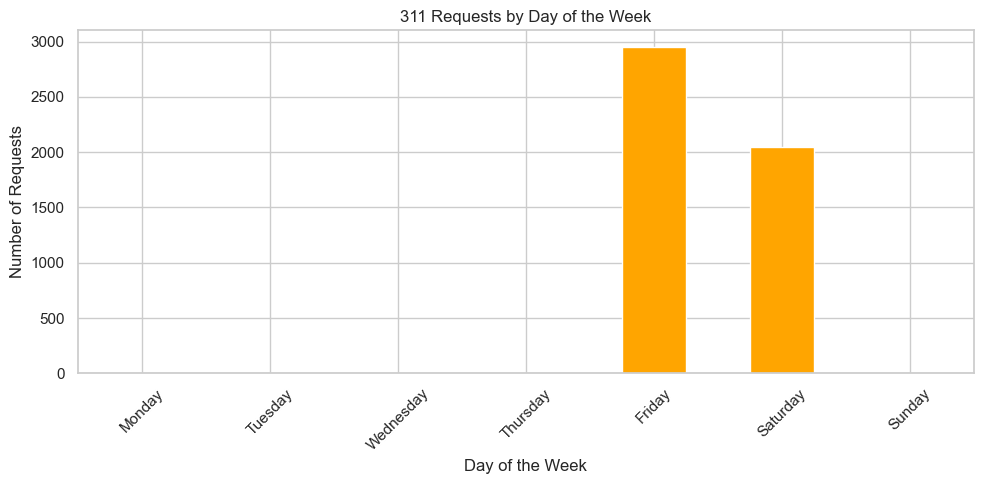

In [6]:
# 1)Requests by Day of the Week
# ---------------------------------------
# Define the order of weekdays to display on the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count requests by weekday and reorder according to the defined weekday_order
weekday_counts = df['Weekday'].value_counts().reindex(weekday_order)

# Set figure size for better visibility
plt.figure(figsize=(10,5))

# Plot the counts as an orange-colored bar chart
weekday_counts.plot(kind='bar', color='orange')

# Add title and axis labels
plt.title('311 Requests by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Requests')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout so labels are not cut off
plt.tight_layout()

# Show the plot
plt.show()
